In [2]:
#Read data for training
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
num_accepted = (4/3)*1252
X=[]
y=[]
max_lines=178678
with open('train_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if ((line_count> (max_lines-num_accepted))):
                y.append(int(row[1]))
                f=row[2:-1]
                X.append([float(i) for i in f])
            line_count += 1
from sklearn.utils import shuffle
randomness=100   
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)
print(len(X))

1670


In [53]:
def calc_vars(yy):
    TP=0
    TN=0
    FP=0
    FN=0
    betta=1
    for i in range(len(yy)):
        if(yy[i]==y_test_circles[i] and yy[i]==1):
            TP+=1
        elif yy[i]==y_test_circles[i] and yy[i]!=1:
            TN+=1
        elif yy[i]!=y_test_circles[i] and yy[i]==1:
            FN+=1
        elif yy[i]!=y_test_circles[i] and yy[i]!=1:
            FP+=1
    ac = (TP+TN)/(TP+TN+FP+FN) * 100
    if (TP+FP==0):
        Perc=0
    else:
        Perc=TP/(TP+FP)
    if (TP+FN==0):
        Recall=0
    else:
        Recall=TP/(TP+FN)
    if ((betta**2)*Perc+Recall==0):
        Fbetta=0
    else:
        Fbetta=(1+betta**2)*Perc*Recall/((betta**2)*Perc+Recall)
    if (TP+FN==0):
        TPR=0
    else:
        TPR=TP/(TP+FN)
    if (FP+TN==0):
        FPR=0
    else:
        FPR=FP/(FP+TN)
    #ROC
    AUC=0.5*(TPR*FPR)+TPR*(1-FPR)+0.5*(1-FPR)*(1-TPR)
    print("Ac=",ac,"Perc=",Perc,"Recall=",Recall,"Fbetta=",Fbetta,"AUC=",AUC)
    ROC = [FPR,TPR]
    plt.plot([i for i in [0,ROC[0],1]] ,[point for point in [0,ROC[1],1]],[i for i in [0,ROC[0],1]] ,[point for point in [0,ROC[1],1]],'ro')
    plt.savefig("l1.png")
    plt.show()


Ac= 73.65269461077844 Perc= 1.0 Recall= 0.7365269461077845 Fbetta= 0.8482758620689654 AUC= 0.8682634730538923


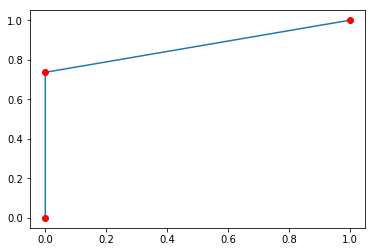

In [54]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,9,5), random_state=1)
clf.fit(X_train_circles, y_train_circles)  
yhat = clf.predict(X_test_circles)
calc_vars(yhat)

Ac= 94.01197604790418 Perc= 0.975609756097561 Recall= 0.9448818897637795 Fbetta= 0.96 AUC= 0.9349409448818898


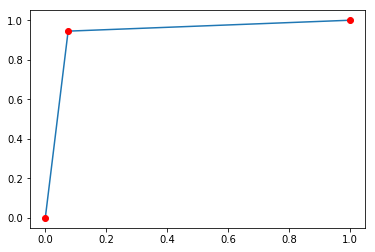

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=33,random_state=1)
clf.fit(X_train_circles, y_train_circles)
yhat = clf.predict(X_test_circles)
calc_vars(yhat)


Ac= 94.61077844311377 Perc= 0.967479674796748 Recall= 0.9596774193548387 Fbetta= 0.9635627530364373 AUC= 0.9333270817704427


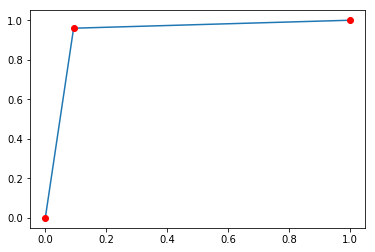

In [56]:
#Bagging
from sklearn.ensemble import BaggingClassifier
max_ = 0
ind=0

clf = BaggingClassifier(n_estimators=27, warm_start=True, random_state=83)
clf.fit(X_train_circles, y_train_circles)

y_pred = clf.predict(X_test_circles)
calc_vars(y_pred)

In [57]:
testing_X=[]
line_count = 0
with open('test_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            f=row[1:-1]
            testing_X.append([float(i) for i in f])
            line_count += 1
y_out = clf.predict(testing_X)

In [58]:
y_out = y_out.astype(int)
np.savetxt("predictions.csv",y_out, fmt='%i')